In [3]:
import requests
import dill as pickle
import pandas as pd
from bs4 import BeautifulSoup
from random import randint
import time
import numpy as np
from datetime import datetime
#from datetime import *
from sklearn.cross_validation import train_test_split
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scraping_functions import actor_movie_table, actor_page_loop, movie_desc_table, movie_page_loop
import arrow

In [4]:
'''
Nicolas Cage's page is the following: http://www.boxofficemojo.com/people/chart/?id=nicolascage.htm
'''

url = 'http://www.boxofficemojo.com/people/chart/?id=nicolascage.htm'
response = requests.get(url)
response.status_code

with open('nc_webpage.pkl', 'w') as picklefile:
    pickle.dump(response, picklefile)

with open("nc_webpage.pkl", 'r') as picklefile: 
    response = pickle.load(picklefile)

In [5]:
page = response.text
soup = BeautifulSoup(page)
all_movie_html_block_1 = soup.find_all('table')[1].find_all('tr')[0].find_all('td')[0].find_all('tr')
all_movie_html_block_2 = soup.find_all('table')[3].find_all('tr')
movie_table1 = actor_movie_table('Nicolas Cage', all_movie_html_block_1)
movie_table2 = actor_movie_table('Nicolas Cage', all_movie_html_block_2)
col = ['date', 'date_url', 'movie', 'movie_url', 'studio', 'studio_url', 'gross', 'gross_url', 'theaters_g', 'theaters_g_url', 'opening', 'opening_url', 'theaters_o', 'theaters_o_url', 'rank', 'rank_url','name']
nc_movies_1 = pd.DataFrame(movie_table1, columns = col)
nc_movies_1['date_url'] = 'http://www.boxofficemojo.com/'+nc_movies_1['date_url']
nc_movies_1['movie_url'] = 'http://www.boxofficemojo.com/'+nc_movies_1['movie_url']
nc_movies_1['studio_url'] = 'http://www.boxofficemojo.com/'+nc_movies_1['studio_url']
nc_movies_1['gross_url'] = 'http://www.boxofficemojo.com/'+nc_movies_1['gross_url']
nc_movies_1['theaters_g_url'] = 'http://www.boxofficemojo.com/'+nc_movies_1['theaters_g_url']
nc_movies_1['opening_url'] = 'http://www.boxofficemojo.com/'+nc_movies_1['opening_url']
nc_movies_1['theaters_o_url'] = 'http://www.boxofficemojo.com/'+nc_movies_1['theaters_o_url']
nc_movies_1['rank_url'] = 'http://www.boxofficemojo.com/'+nc_movies_1['rank_url']

/home/john/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [33]:
# Quick format for the list of lists

nc_movies = [[arrow.get(date,'M/D/YY'), movie, "http://www.boxofficemojo.com"+movie_url, int(gross[1:].replace(',', '')), name] for date, date_url, movie, movie_url, studio, studio_url, gross, gross_url, theaters_g, theaters_g_url, opening, opening_url, theaters_o, theaters_o_url, rank, rank_url, name in movie_table1]

In [35]:
'''
Loop through Nicolas Cage movies to find people who have worked with him
'''

loop_df = [x[2] for x in nc_movies]
nc_colab = movie_page_loop(loop_df)

In [42]:
'''
Only grab actors who have worked with Nicolas Cage
'''

nc_actors = []
actor_stuff = []
for row in nc_colab:
    for movie, name, role, url in row:
        if role == u'Actors:':
            if url == "":
                url = ""
            else:
                url = "http://www.boxofficemojo.com"+url
            actor_stuff = [movie, name, role, url]
            nc_actors.append(actor_stuff)

In [45]:
'''
Manipulate output list to create a new list to loop through to find out more information about actors that
have worked with Nicolas Cage
'''

loop_df = []
for row in nc_actors:
    name = row[1].replace('*','')
    url =  row[3]
    loop_df.append([name,url])

loop_dict = {}
for row in loop_df:
    loop_dict[row[0]] = row[1]

unique_loop = []
for actor in loop_dict:
    unique_loop.append([actor, loop_dict[actor]])

New part to avoid pandas

In [58]:
'''
Create dataset of movies of actors that have worked with Nicolas Cage
'''

all_actor_movies = actor_page_loop(unique_loop)

In [50]:
all_actor_movies[0]

[u'12/12/14',
 '/schedule/?view=bydate&release=theatrical&date=2014-12-12&p=.htm',
 u'Inherent Vice',
 '/movies/?id=inherentvice.htm',
 u'WB',
 '/studio/chart/?studio=warnerbros.htm',
 u'$8,110,975',
 '',
 u'653',
 '',
 u'$328,184',
 '',
 u'5',
 '',
 u'11',
 '',
 u'Michael K. Williams']

In [68]:
all_actor_movies_clean = []
for date, date_url, movie, movie_url, studio, studio_url, gross, gross_url, theaters_g, theaters_g_url, opening, opening_url, theaters_o, theaters_o_url, rank, rank_url, name in all_actor_movies:
    try:
        all_actor_movies_clean.append([arrow.get(date,'M/D/YY'), movie, "http://www.boxofficemojo.com"+movie_url, int(gross[1:].replace(',', '')), name])
    except:
        continue
        


In [75]:
loop_url = [x[2] for x in all_actor_movies_clean]

In [76]:
movies_list_nonnc = movie_page_loop(loop_url)

In [77]:
len(movies_list_nonnc)

3306

In [79]:
movies_list_nonnc[0]

[[u'Inherent Vice',
  u'Paul Thomas Anderson',
  u'Director:',
  '/people/chart/?view=Director&id=paulthomasanderson.htm'],
 [u'Inherent Vice',
  u'Paul Thomas Anderson',
  u'Writer:',
  '/people/chart/?view=Writer&id=paulthomasanderson.htm'],
 [u'Inherent Vice',
  u'Michael K. Williams',
  u'Actors:',
  '/people/chart/?view=Actor&id=michaelkwilliams.htm'],
 [u'Inherent Vice',
  u'Joaquin Phoenix',
  u'Actors:',
  '/people/chart/?view=Actor&id=joaquinphoenix.htm'],
 [u'Inherent Vice',
  u'Josh Brolin',
  u'Actors:',
  '/people/chart/?view=Actor&id=joshbrolin.htm'],
 [u'Inherent Vice',
  u'Owen Wilson',
  u'Actors:',
  '/people/chart/?view=Actor&id=owenwilson.htm'],
 [u'Inherent Vice',
  u'Reese Witherspoon',
  u'Actors:',
  '/people/chart/?view=Actor&id=reesewitherspoon.htm'],
 [u'Inherent Vice',
  u'Benicio Del Toro',
  u'Actors:',
  '/people/chart/?view=Actor&id=beniciodeltoro.htm'],
 [u'Inherent Vice',
  u'Jena Malone',
  u'Actors:',
  '/people/chart/?view=Actor&id=jenamalone.htm'],

In [ ]:
new_table = []
for row in movies_df_nonnc:
    for x in row:
        new_table.append(x)

list_1 = []
list_2 = []
for row in new_table:
    if type(row) == type([]):
        list_1.append(row)
    else:
        list_2.append(row)

In [11]:
new_table = []
for row in movies_df_nonnc:
    for x in row:
        new_table.append(x)

list_1 = []
list_2 = []
for row in new_table:
    if type(row) == type([]):
        list_1.append(row)
    else:
        list_2.append(row)

col = ['movie', 'name', 'role', 'url']
all_movies_df = pd.DataFrame(list_1, columns = col)
all_movies_df['url'] = 'http://www.boxofficemojo.com'+all_movies_df['url']

In [12]:
all_actors = []
actor_stuff = []
for movie, name, role, url in new_table:
    if role == u'Actors:':
        if url == "":
            url = ""
        else:
            url = "http://www.boxofficemojo.com"+url
            actor_stuff = [movie, name, role, url]
            all_actors.append(actor_stuff)

In [13]:
all_actors_loop = []
for movie, name, role, url in all_actors:
    name = name.replace('*','')
    url =  url
    all_actors_loop.append([name,url])

all_actors_dict = {}
for row in all_actors_loop:
    all_actors_dict[row[0]] = row[1]

unique_all_actors = []
for actor in all_actors_dict:
    unique_all_actors.append([actor, all_actors_dict[actor]])
    
comp_actor_movies = actor_page_loop(unique_all_actors)

In [17]:
comp_actor_movies

[[u'7/11/08',
  '/schedule/?view=bydate&release=theatrical&date=2008-07-11&p=.htm',
  u'August',
  '/movies/?id=august08.htm',
  u'First',
  '/studio/chart/?studio=firstlook.htm',
  u'$12,636',
  '',
  u'1',
  '',
  u'$8,092',
  '',
  u'1',
  '',
  u'18',
  '',
  u'Josh Hartnett'],
 [u'10/19/07',
  '/schedule/?view=bydate&release=theatrical&date=2007-10-19&p=.htm',
  u'30 Days of Night',
  '/movies/?id=30daysofnight.htm',
  u'Sony',
  '/studio/chart/?studio=sony.htm',
  u'$39,568,996',
  '',
  u'2,859',
  '',
  u'$15,951,902',
  '',
  u'2,855',
  '',
  u'6',
  '',
  u'Josh Hartnett'],
 [u'8/24/07',
  '/schedule/?view=bydate&release=theatrical&date=2007-08-24&p=.htm',
  u'Resurrecting the Champ',
  '/movies/?id=resurrectingthechamp.htm',
  u'YFG',
  '/studio/chart/?studio=yarifilmgroup.htm',
  u'$3,172,573',
  '',
  u'1,605',
  '',
  u'$1,667,659',
  '',
  u'1,605',
  '',
  u'15',
  '',
  u'Josh Hartnett'],
 [u'9/15/06',
  '/schedule/?view=bydate&release=theatrical&date=2006-09-15&p=.ht

In [20]:
col = ['date', 'date_url', 'movie', 'movie_url', 'studio', 'studio_url', 'gross', 'gross_url', 'theaters_g', 'theaters_g_url', 'opening', 'opening_url', 'theaters_o', 'theaters_o_url', 'rank', 'rank_url','name']
comp_actor_df = pd.DataFrame(comp_actor_movies, columns = col)
comp_actor_df

,date,date_url,movie,movie_url,studio,studio_url,gross,gross_url,theaters_g,theaters_g_url,opening,opening_url,theaters_o,theaters_o_url,rank,rank_url,name
0,7/11/08,/schedule/?view=bydate&release=theatrical&date...,August,/movies/?id=august08.htm,First,/studio/chart/?studio=firstlook.htm,"$12,636",,1,,"$8,092",,1,,18,,Josh Hartnett
1,10/19/07,/schedule/?view=bydate&release=theatrical&date...,30 Days of Night,/movies/?id=30daysofnight.htm,Sony,/studio/chart/?studio=sony.htm,"$39,568,996",,"2,859",,"$15,951,902",,"2,855",,6,,Josh Hartnett
2,8/24/07,/schedule/?view=bydate&release=theatrical&date...,Resurrecting the Champ,/movies/?id=resurrectingthechamp.htm,YFG,/studio/chart/?studio=yarifilmgroup.htm,"$3,172,573",,"1,605",,"$1,667,659",,"1,605",,15,,Josh Hartnett
3,9/15/06,/schedule/?view=bydate&release=theatrical&date...,The Black Dahlia,/movies/?id=blackdahlia.htm,Uni.,/studio/chart/?studio=universal.htm,"$22,545,080",,"2,236",,"$10,005,895",,"2,226",,9,,Josh Hartnett
4,4/14/06,/schedule/?view=bydate&release=theatrical&date...,Mozart and the Whale,/movies/?id=mozartandthewhale.htm,Mill.,/studio/chart/?studio=millenniumfilms.htm,"$36,006",,5,,"$19,610",,5,,17,,Josh Hartnett
5,4/7/06,/schedule/?view=bydate&release=theatrical&date...,Lucky Number Slevin,/movies/?id=luckynumberslevin.htm,MGM/W,/studio/chart/?studio=mgmweinstein.htm,"$22,495,466",,"1,989",,"$7,031,921",,"1,984",,10,,Josh Hartnett
6,4/1/05,/schedule/?view=bydate&release=theatrical&date...,Sin City,/movies/?id=sincity.htm,Dim.,/studio/chart/?studio=dimension.htm,"$74,103,820",,"3,230",,"$29,120,273",,"3,230",,3,,Josh Hartnett
7,9/3/04,/schedule/?view=bydate&release=theatrical&date...,Wicker Park,/movies/?id=wickerpark.htm,MGM,/studio/chart/?studio=mgm.htm,"$13,001,257",,"2,598",,"$5,467,281",,"2,598",,12,,Josh Hartnett
8,6/13/03,/schedule/?view=bydate&release=theatrical&date...,Hollywood Homicide,/movies/?id=hollywoodhomicide.htm,SonR,/studio/chart/?studio=revolutionstudios.htm,"$30,940,691",,"2,840",,"$11,112,632",,"2,840",,8,,Josh Hartnett
9,3/1/02,/schedule/?view=bydate&release=theatrical&date...,40 Days and 40 Nights,/movies/?id=40daysand40nights.htm,Mira.,/studio/chart/?studio=miramax.htm,"$37,950,822",,"2,399",,"$12,229,529",,"2,225",,7,,Josh Hartnett


In [33]:
comp_actor_df['date'] = pd.to_datetime(comp_actor_df['date'])
comp_actor_df = comp_actor_df[comp_actor_df.date != 'N/A']
comp_actor_df['gross'] = (comp_actor_df['gross'].replace('[\$,)]','', regex=True).replace( '[(]','-', regex=True ).convert_objects(convert_numeric=True).astype(float))
comp_actor_df['name'] = comp_actor_df['name'].str.replace('*', '')
calc_comp_actor_df = comp_actor_df[['name','movie','date','gross']]

ValueError: Unknown string format

In [ ]:
def date_loop(date_list, date_range):
    df_final = pd.DataFrame()
    for date in date_list:
        date_before_bound = relevant_dates[relevant_dates.date < date]#.sort('date', ascending = False)
        date_before = date_before_bound[date_before_bound.date > date-timedelta(days = date_range)].sort('date', ascending = False)
        date_after_bound = relevant_dates[relevant_dates.date > date].sort('date', ascending = False)
        date_after = date_after_bound[date_after_bound.date < date + timedelta(days = date_range)].sort('date', ascending = False)
        groupby_before = date_before.groupby('name')#.mean('gross')
        date_before_count = groupby_before.count(['movie']).reset_index()
        date_before_sum = groupby_before.sum().reset_index()
        date_before_mean = groupby_before.mean().reset_index()
        col = ['name', 'before_movie_count', 'before_total_gross', 'before_mean_gross']
        date_before_summary = pd.DataFrame(columns = col)
        date_before_summary['name'] = date_before_count['name']
        date_before_summary['before_movie_count'] = date_before_count['movie']
        date_before_summary['before_total_gross'] = date_before_sum['gross']
        date_before_summary['before_mean_gross'] = date_before_mean['gross']
        date_before_summary['date'] = date
        groupby_after = date_after.groupby('name')#.mean('gross')
        date_after_count = groupby_after.count(['movie']).reset_index()
        date_after_sum = groupby_after.sum().reset_index()
        date_after_mean = groupby_after.mean().reset_index()
        col = ['name', 'after_movie_count', 'after_total_gross', 'after_mean_gross']
        date_after_summary = pd.DataFrame(columns = col)
        date_after_summary['name'] = date_after_count['name']
        date_after_summary['after_movie_count'] = date_after_count['movie']
        date_after_summary['after_total_gross'] = date_after_sum['gross']
        date_after_summary['after_mean_gross'] = date_after_mean['gross']
        date_after_summary['date'] = date
        date_summary = pd.merge(left=date_before_summary, right=date_after_summary, how='outer', on = ['name', 'date'])
        #col = ['name', 'date', 'before_movie_count', 'before_total_gross', 'before_mean_gross', 'after_movie_count', 'after_total_gross', 'after_mean_gross']
        #df_final = date_summary
        #print date_summary.head()
        df_final = df_final.append(date_summary, ignore_index = True)
        #print df_final.head()
    df_final = df_final.dropna()
    return df_final

In [24]:
date_boundry_upper = calc_comp_actor_df[calc_comp_actor_df.date < datetime(2016,1,1)].sort('date', ascending = False)
relevant_dates = date_boundry_upper[date_boundry_upper.date > datetime(1970,1,1)].sort('date', ascending = True)
relevant_dates

comparison_nc_df = calc_comp_actor_df[calc_comp_actor_df['name'] == 'Nicolas Cage']
comparison_nc_df = comparison_nc_df[['movie', 'date']].reset_index()
comparison_nc_df = comparison_nc_df[['movie', 'date']]
compare_frame_test = comparison_nc_df['movie'].tolist()
comparison_actor_df = calc_comp_actor_df
comparison_actor_df['nc_movie'] = comparison_actor_df[['movie']].isin(compare_frame_test)
comparison_actor_df[comparison_actor_df['nc_movie'] == True]
## This is a frame of actors, movies, and dates where they were in movies with Nicolas Cage
nc_actor_frame = comparison_actor_df[comparison_actor_df['nc_movie'] == True]
nc_actor_list = nc_actor_frame[['name','date']]
actor_list = nc_actor_list['name'].tolist()
date_list = nc_actor_list['date'].tolist()
zip_list = zip(actor_list, date_list)

nc_dates = calc_comp_actor_df[calc_comp_actor_df['name'] == 'Nicolas Cage']
nc_dates_list = nc_dates['date'].tolist()
analysis_frame = date_loop(nc_dates_list, 300)
analysis_frame = analysis_frame.dropna()
analysis_frame.head()

analysis_frame2 = analysis_frame
analysis_frame2['name_date'] = zip(analysis_frame['name'], analysis_frame['date'])
analysis_frame2['nc_movies'] = analysis_frame.name_date.apply(lambda x: x in zip_list)
analysis_frame2[analysis_frame2['nc_movies'] == True]
analysis_frame2.head()


/Users/johnwalters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,before_movie_count,before_total_gross,before_mean_gross,date,after_movie_count,after_total_gross,after_mean_gross,name_date,nc_movies
1,Aaron Johnson,1,200676069,200676069,2014-10-03,1,459005868,459005868.0,"(Aaron Johnson, 2014-10-03 00:00:00)",False
3,Abigail Breslin,1,37738810,37738810,2014-10-03,1,187112,187112.0,"(Abigail Breslin, 2014-10-03 00:00:00)",False
4,Adam Sandler,2,47000518,23500259,2014-10-03,1,78202755,78202755.0,"(Adam Sandler, 2014-10-03 00:00:00)",False
5,Adam Scott,1,58236838,58236838,2014-10-03,2,13425173,6712586.5,"(Adam Scott, 2014-10-03 00:00:00)",False
10,Amanda Crew,1,2827666,2827666,2014-10-03,1,42629776,42629776.0,"(Amanda Crew, 2014-10-03 00:00:00)",False


In [25]:
comparison_nc_df = calc_comp_actor_df[calc_comp_actor_df['name'] == 'Nicolas Cage']
comparison_nc_df = comparison_nc_df[['movie', 'date']].reset_index()
comparison_nc_df = comparison_nc_df[['movie', 'date']]
compare_frame_test = comparison_nc_df['movie'].tolist()
comparison_actor_df = calc_comp_actor_df
comparison_actor_df['nc_movie'] = comparison_actor_df[['movie']].isin(compare_frame_test)
comparison_actor_df[comparison_actor_df['nc_movie'] == True]
## This is a frame of actors, movies, and dates where they were in movies with Nicolas Cage
nc_actor_frame = comparison_actor_df[comparison_actor_df['nc_movie'] == True]
nc_actor_list = nc_actor_frame[['name','date']]
actor_list = nc_actor_list['name'].tolist()
date_list = nc_actor_list['date'].tolist()
zip_list = zip(actor_list, date_list)
analysis_frame2 = analysis_frame
analysis_frame2['name_date'] = zip(analysis_frame['name'], analysis_frame['date'])
analysis_frame2['nc_movies'] = analysis_frame.name_date.apply(lambda x: x in zip_list)
analysis_frame2[analysis_frame2['nc_movies'] == True]
analysis_frame2.head()

/Users/johnwalters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,before_movie_count,before_total_gross,before_mean_gross,date,after_movie_count,after_total_gross,after_mean_gross,name_date,nc_movies
1,Aaron Johnson,1,200676069,200676069,2014-10-03,1,459005868,459005868.0,"(Aaron Johnson, 2014-10-03 00:00:00)",False
3,Abigail Breslin,1,37738810,37738810,2014-10-03,1,187112,187112.0,"(Abigail Breslin, 2014-10-03 00:00:00)",False
4,Adam Sandler,2,47000518,23500259,2014-10-03,1,78202755,78202755.0,"(Adam Sandler, 2014-10-03 00:00:00)",False
5,Adam Scott,1,58236838,58236838,2014-10-03,2,13425173,6712586.5,"(Adam Scott, 2014-10-03 00:00:00)",False
10,Amanda Crew,1,2827666,2827666,2014-10-03,1,42629776,42629776.0,"(Amanda Crew, 2014-10-03 00:00:00)",False


In [26]:
y, X = dmatrices('after_mean_gross ~ before_mean_gross + nc_movies', data=analysis_frame2, return_type='dataframe')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [28]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       after_mean_gross   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           5.06e-54
Time:                        22:45:58   Log-Likelihood:            -1.6043e+05
No. Observations:                8196   AIC:                         3.209e+05
Df Residuals:                    8193   BIC:                         3.209e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          4.787e+07   1.07e+06     44.873      0.000      4.58e+07     5e+07
nc_movies[T.True] -7.219e+06   9.08e+06     -0.795      0.426      -2.5e+07  1.06e+07
before_mean_gross     0.1905      0.012     15.757      0.000         0.167     0.214
==============================================================================
Omnibus:                     5429.182   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79589.041
Skew:                           3.014   Prob(JB):                         0.00
Kurtosis:                      17.026   Cond. No.                     9.42e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ceb9850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10da26ad0>]], dtype=object)

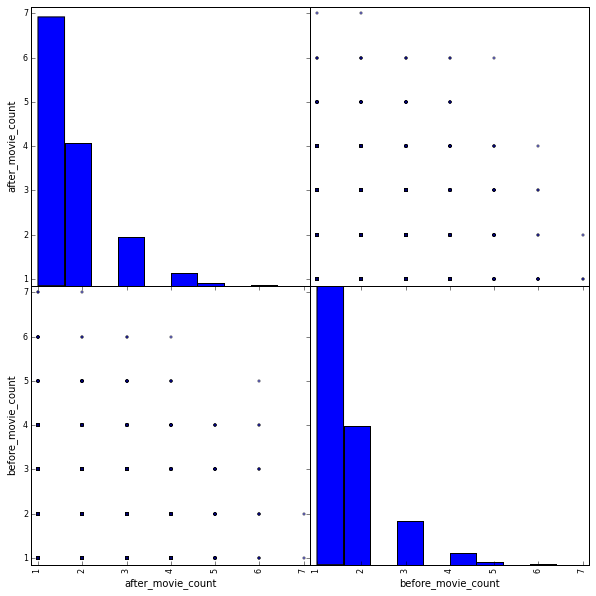

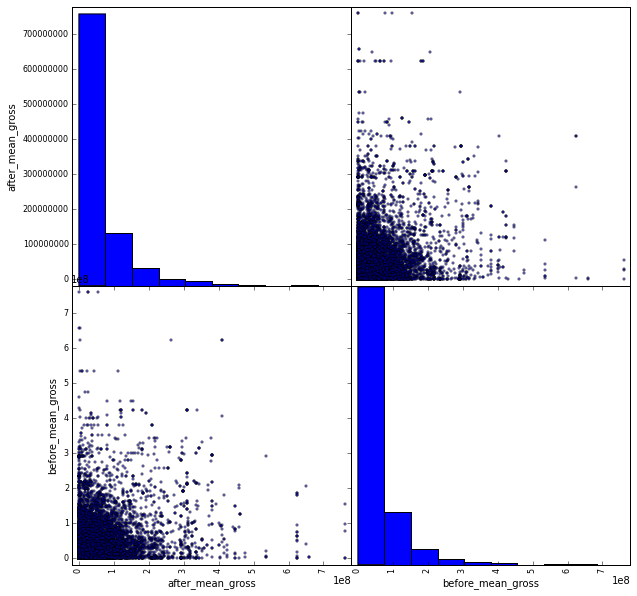

In [30]:
%matplotlib inline
cols = ['after_movie_count', 'before_movie_count']
pd.scatter_matrix(analysis_frame2[cols], figsize=(10, 10))
cols = ['after_mean_gross', 'before_mean_gross']
pd.scatter_matrix(analysis_frame2[cols], figsize=(10, 10))

In [31]:
count_list = range(1,6)

def analysis_loop(count_list):
    frame_list = []
    nc_dates = calc_comp_actor_df[calc_comp_actor_df['name'] == 'Nicolas Cage']
    nc_dates_list = nc_dates['date'].tolist()
    for x in count_list:
        date_range = x*300
        analysis_frame = date_loop(nc_dates_list, date_range)
        comparison_nc_df = calc_comp_actor_df[calc_comp_actor_df['name'] == 'Nicolas Cage']
        comparison_nc_df = comparison_nc_df[['movie', 'date']].reset_index()
        comparison_nc_df = comparison_nc_df[['movie', 'date']]
        compare_frame_test = comparison_nc_df['movie'].tolist()
        comparison_actor_df = calc_comp_actor_df
        comparison_actor_df['nc_movie'] = comparison_actor_df[['movie']].isin(compare_frame_test)
        comparison_actor_df[comparison_actor_df['nc_movie'] == True]
        ## This is a frame of actors, movies, and dates where they were in movies with Nicolas Cage
        nc_actor_frame = comparison_actor_df[comparison_actor_df['nc_movie'] == True]
        nc_actor_list = nc_actor_frame[['name','date']]
        actor_list = nc_actor_list['name'].tolist()
        date_list = nc_actor_list['date'].tolist()
        zip_list = zip(actor_list, date_list)
        analysis_frame['name_date'] = zip(analysis_frame['name'], analysis_frame['date'])
        analysis_frame['nc_movies'] = analysis_frame.name_date.apply(lambda x: x in zip_list)
        frame_list.append(analysis_frame)
    return frame_list

In [32]:
count_list = range(1,11)
all_models = analysis_loop(count_list)

/Users/johnwalters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


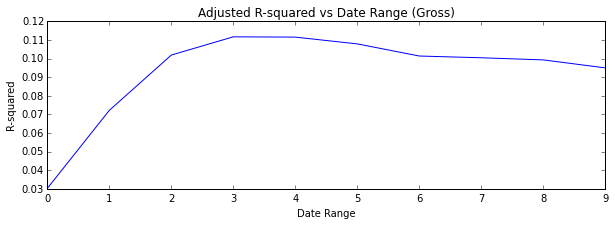

In [33]:
results = []
models = []
for frame in all_models:  #list of frames #originally labeled all_models
    y, X = dmatrices('after_mean_gross ~ before_mean_gross + nc_movies', data=frame, return_type='dataframe')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
    model = sm.OLS(y_train, X_train)
    models.append(model)
    results.append(model.fit())

len(results), len(models)
adj_r_sq = []

for i in range(len(results)):
    adj_r_sq.append(results[i].rsquared_adj)
plt.figure(figsize = (10, 3))
plt.plot(adj_r_sq)
#plt.plot(range(1, 16), adj_r_sq)

plt.title('Adjusted R-squared vs Date Range (Gross)')
plt.ylabel('R-squared')
plt.xlabel('Date Range')  
plt.gcf()
plt.savefig('r squared gross.png')

In [34]:
adj_r_sq

[0.03023351426996701,
 0.072179596215251607,
 0.1019106416726413,
 0.11170780615389742,
 0.11155259777872795,
 0.10790248577360662,
 0.10138610453317687,
 0.10044433289010524,
 0.099302929864506395,
 0.095007978667127957]

### Model 4 observes the affect Nicolas Cage has on individuals before and after 1200 days (approx 3 years) 

In [35]:
y, X = dmatrices('after_mean_gross ~ before_mean_gross + nc_movies', data=all_models[4], return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       after_mean_gross   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 13 Oct 2015   Prob (F-statistic):               0.00
Time:                        09:03:04   Log-Likelihood:            -3.6148e+05
No. Observations:               18924   AIC:                         7.230e+05
Df Residuals:                   18921   BIC:                         7.230e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           3.55e+07   5.09e+05     69.769      0.000      3.45e+07  3.65e+07
nc_movies[T.True] -6.365e+06   4.22e+06     -1.507      0.132     -1.46e+07  1.92e+06
before_mean_gross     0.3769      0.008     49.112      0.000         0.362     0.392
==============================================================================
Omnibus:                     8626.386   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64241.119
Skew:                           2.047   Prob(JB):                         0.00
Kurtosis:                      11.044   Cond. No.                     8.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111598f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11227d410>]], dtype=object)

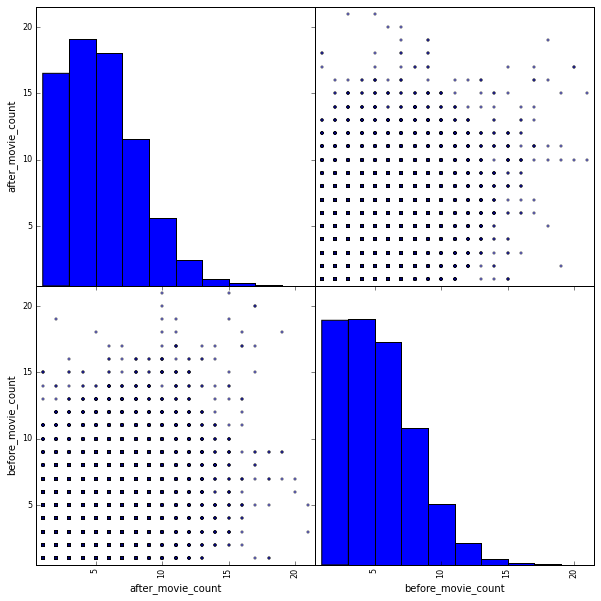

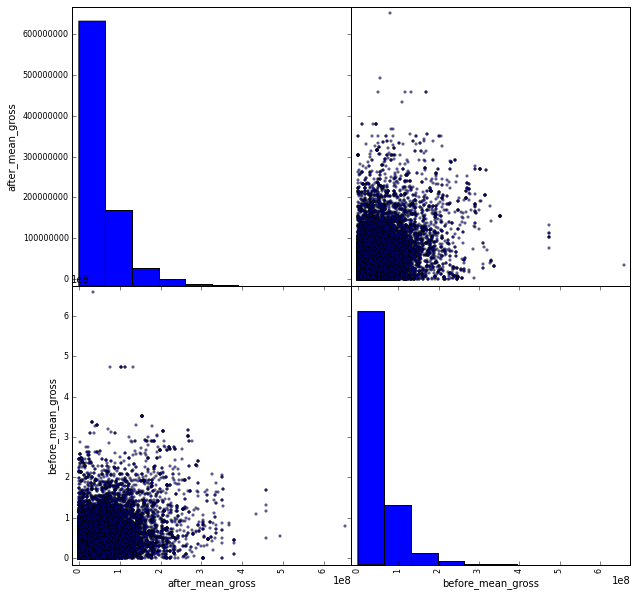

In [36]:
cols = ['after_movie_count', 'before_movie_count']
pd.scatter_matrix(all_models[4][cols], figsize=(10, 10))
cols = ['after_mean_gross', 'before_mean_gross']
pd.scatter_matrix(all_models[4][cols], figsize=(10, 10))

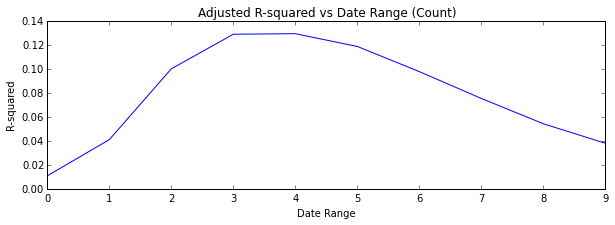

In [37]:
results = []
models = []
for frame in all_models:  #list of frames #originally labeled all_models
    y, X = dmatrices('after_movie_count ~ before_movie_count + nc_movies', data=frame, return_type='dataframe')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
    model = sm.OLS(y_train, X_train)
    models.append(model)
    results.append(model.fit())

len(results), len(models)
adj_r_sq = []

for i in range(len(results)):
    adj_r_sq.append(results[i].rsquared_adj)
plt.figure(figsize = (10, 3))
plt.plot(adj_r_sq)
plt.title('Adjusted R-squared vs Date Range (Count)')
plt.ylabel('R-squared')
plt.xlabel('Date Range')  
plt.gcf()
plt.savefig('r squared count.png')

In [38]:
y, X = dmatrices('after_movie_count ~ before_movie_count + nc_movies', data=all_models[4], return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      after_movie_count   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1434.
Date:                Tue, 13 Oct 2015   Prob (F-statistic):               0.00
Time:                        09:03:10   Log-Likelihood:                -45194.
No. Observations:               18924   AIC:                         9.039e+04
Df Residuals:                   18921   BIC:                         9.042e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              3.2064      0.037     85.917      0.000         3.133     3.280
nc_movies[T.True]      0.8743      0.233      3.750      0.000         0.417     1.331
before_movie_count     0.3633      0.007     53.181      0.000         0.350     0.377
==============================================================================
Omnibus:                     1652.465   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2263.022
Skew:                           0.726   Prob(JB):                         0.00
Kurtosis:                       3.873   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

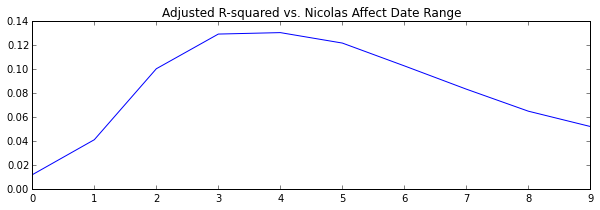

In [39]:
results = []
models = []
for frame in all_models:  #list of frames #originally labeled all_models
    y, X = dmatrices('after_movie_count ~ before_movie_count + before_mean_gross + nc_movies', data=frame, return_type='dataframe')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
    model = sm.OLS(y_train, X_train)
    models.append(model)
    results.append(model.fit())

len(results), len(models)
adj_r_sq = []

for i in range(len(results)):
    adj_r_sq.append(results[i].rsquared_adj)
plt.figure(figsize = (10, 3))
plt.plot(adj_r_sq)
#plt.plot(range(1, 16), adj_r_sq)
plt.title('Adjusted R-squared vs. Nicolas Affect Date Range')

In [40]:
y, X = dmatrices('after_movie_count ~ before_movie_count + before_mean_gross + nc_movies', data=all_models[4], return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      after_movie_count   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     964.8
Date:                Tue, 13 Oct 2015   Prob (F-statistic):               0.00
Time:                        09:03:17   Log-Likelihood:                -45182.
No. Observations:               18924   AIC:                         9.037e+04
Df Residuals:                   18920   BIC:                         9.040e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              3.2969      0.042     79.092      0.000         3.215     3.379
nc_movies[T.True]      0.8573      0.233      3.679      0.000         0.401     1.314
before_movie_count     0.3651      0.007     53.403      0.000         0.352     0.379
before_mean_gross  -2.061e-09   4.24e-10     -4.865      0.000     -2.89e-09 -1.23e-09
==============================================================================
Omnibus:                     1641.317   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2245.290
Skew:                           0.723   Prob(JB):                         0.00
Kurtosis:                       3.871   Cond. No.                     8.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

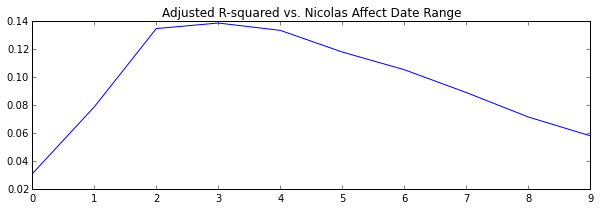

In [41]:
results = []
models = []
for frame in all_models:  #list of frames #originally labeled all_models
    y, X = dmatrices('after_total_gross ~ before_total_gross + nc_movies', data=frame, return_type='dataframe')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
    model = sm.OLS(y_train, X_train)
    models.append(model)
    results.append(model.fit())

len(results), len(models)
adj_r_sq = []

for i in range(len(results)):
    adj_r_sq.append(results[i].rsquared_adj)
plt.figure(figsize = (10, 3))
plt.plot(adj_r_sq)
#plt.plot(range(1, 16), adj_r_sq)
plt.title('Adjusted R-squared vs. Nicolas Affect Date Range')

In [42]:
y, X = dmatrices('after_total_gross ~ before_total_gross + nc_movies', data=all_models[3], return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      after_total_gross   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1538.
Date:                Tue, 13 Oct 2015   Prob (F-statistic):               0.00
Time:                        09:03:22   Log-Likelihood:            -3.7617e+05
No. Observations:               18238   AIC:                         7.524e+05
Df Residuals:                   18235   BIC:                         7.524e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           1.375e+08   2.23e+06     61.636      0.000      1.33e+08  1.42e+08
nc_movies[T.True]  -6.509e+06   1.93e+07     -0.337      0.736     -4.44e+07  3.14e+07
before_total_gross     0.4272      0.008     55.455      0.000         0.412     0.442
==============================================================================
Omnibus:                     7343.728   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37164.102
Skew:                           1.905   Prob(JB):                         0.00
Kurtosis:                       8.864   Cond. No.                     3.44e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f6d3ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a147d10>]], dtype=object)

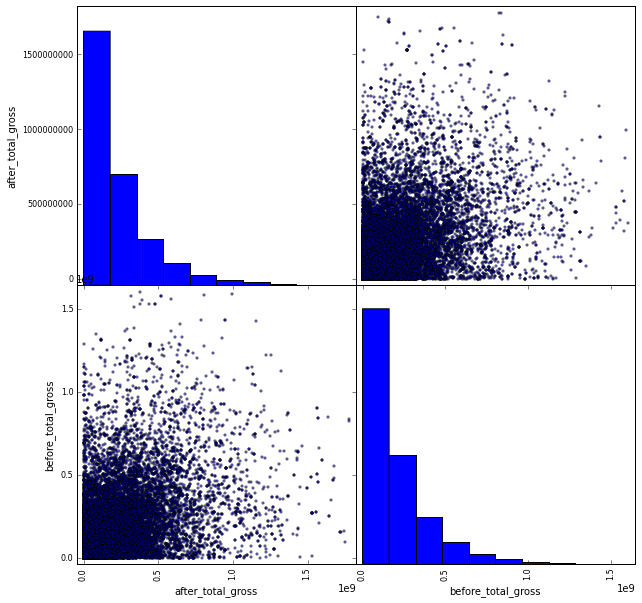

In [43]:
cols = ['after_total_gross', 'before_total_gross']
pd.scatter_matrix(all_models[3][cols], figsize=(10, 10))

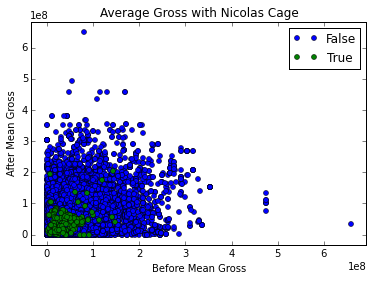

In [44]:
groups = all_models[4].groupby('nc_movies')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.before_mean_gross, group.after_mean_gross, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.ylabel('After Mean Gross')
plt.xlabel('Before Mean Gross')
plt.title('Average Gross with Nicolas Cage')
plt.gcf()
plt.savefig('avg gross.png')
plt.show()


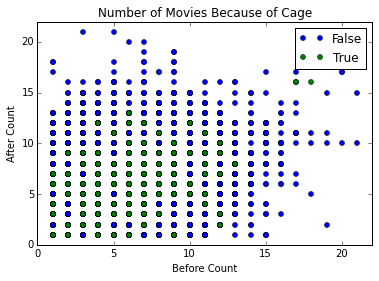

In [45]:
groups = all_models[4].groupby('nc_movies')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.before_movie_count, group.after_movie_count, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.ylabel('After Count')
plt.xlabel('Before Count')
plt.title('Number of Movies Because of Cage')
plt.gcf()
plt.savefig('count.png')
plt.show()

In [46]:
y, X = dmatrices('after_movie_count ~ before_movie_count + before_mean_gross + nc_movies', data=all_models[4], return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      after_movie_count   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     964.8
Date:                Tue, 13 Oct 2015   Prob (F-statistic):               0.00
Time:                        09:03:33   Log-Likelihood:                -45182.
No. Observations:               18924   AIC:                         9.037e+04
Df Residuals:                   18920   BIC:                         9.040e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              3.2969      0.042     79.092      0.000         3.215     3.379
nc_movies[T.True]      0.8573      0.233      3.679      0.000         0.401     1.314
before_movie_count     0.3651      0.007     53.403      0.000         0.352     0.379
before_mean_gross  -2.061e-09   4.24e-10     -4.865      0.000     -2.89e-09 -1.23e-09
==============================================================================
Omnibus:                     1641.317   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2245.290
Skew:                           0.723   Prob(JB):                         0.00
Kurtosis:                       3.871   Cond. No.                     8.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
predicts = results.predict(X_test)
predicts

array([ 4.38668622,  6.84560091,  4.32793998, ...,  3.97411855,
        4.53929255,  4.78457511])

In [48]:
mse = mean_squared_error(y_test, predicts)

In [49]:
mse

6.8350432271236112

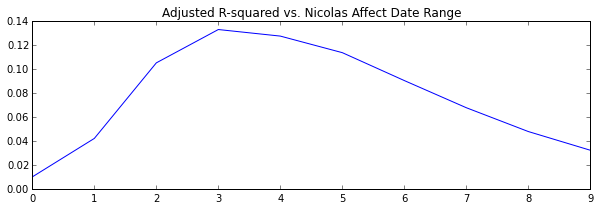

In [51]:
results = []
models = []
for frame in all_models:  #list of frames #originally labeled all_models
    y, X = dmatrices('np.sqrt(after_movie_count) ~ np.sqrt(before_movie_count) + nc_movies', data=frame, return_type='dataframe')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
    model = sm.OLS(y_train, X_train)
    models.append(model)
    results.append(model.fit())

len(results), len(models)
adj_r_sq = []

for i in range(len(results)):
    adj_r_sq.append(results[i].rsquared_adj)
plt.figure(figsize = (10, 3))
plt.plot(adj_r_sq)
#plt.plot(range(1, 16), adj_r_sq)
plt.title('Adjusted R-squared vs. Nicolas Affect Date Range')

In [ ]:
groups = all_models[4].groupby('nc_movies')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.before_movie_count, group.after_movie_count, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.ylabel('After Count')
plt.xlabel('Before Count')
plt.title('Number of Movies Because of Cage')
plt.gcf()
plt.savefig('count.png')
plt.show()